<a href="https://colab.research.google.com/github/Amanr1996/Capstone_Zomato_Restaurant_clustering_and_sentiment_Analysis/blob/main/Zomato_Restaurant_clustering_and_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato Restaurant Clustering and Sentiment Analysis.




##### **Project Type**    - Unsupervised


##### **Contribution**    - Individual

# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

There are two separate files, while the columns are self explanatory. Below is a brief description:

Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **GitHub Link -**

https://github.com/Amanr1996/Capstone_Zomato_Restaurant_clustering_and_sentiment_Analysis

# **Problem Statement**


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing datasets.
meta_df_main=pd.read_csv("/content/drive/MyDrive/Capstone_Project_4/Zomato Restaurant names and Metadata.csv")

### Dataset First View

In [4]:
# Dataset First Look
meta_df_main.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count.

print(f' We have total {meta_df_main.shape[0]} rows and {meta_df_main.shape[1]} columns.')
  

 We have total 105 rows and 6 columns.


### Dataset Information

In [ ]:
# Dataset Info
meta_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f'We have {meta_df_main.duplicated().sum()} duplicate Values present in Data set')

We have 0 duplicate Values present in Data set


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(f'Count of null values present in the data set \n {meta_df_main.isnull().sum()}')

Count of null values present in the data set 
 Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [10]:

# Checking for Null values.

meta_df_main[meta_df_main['Collections'].isnull()].head()

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM


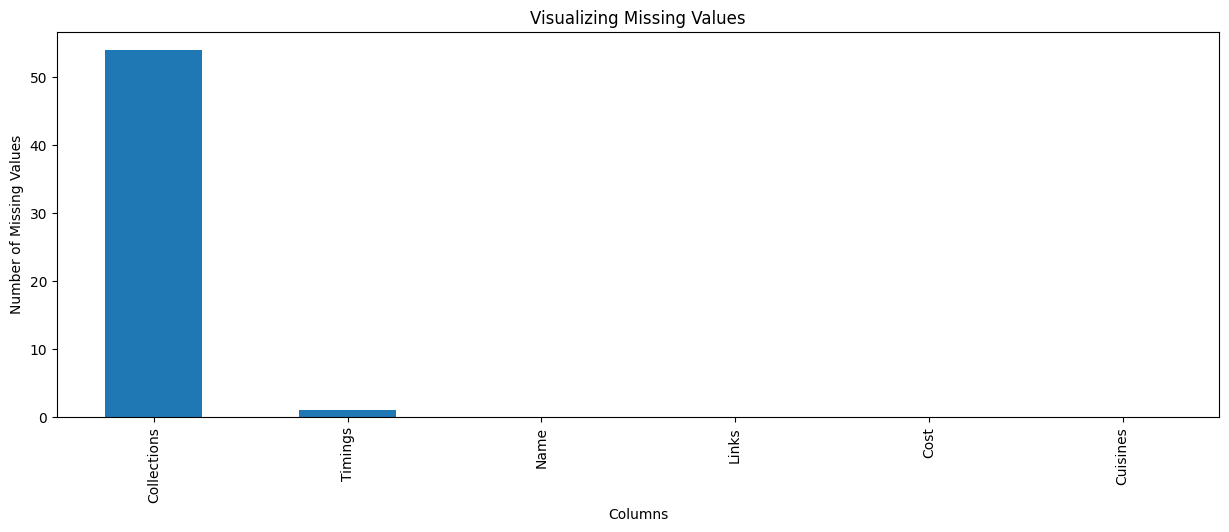

In [7]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
missing_values = meta_df_main.isnull().sum().sort_values(ascending=False)
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

### What did you know about your dataset?

Our data has missing values in collection column. Since the column contains sentiments hence no need to impute the null values.

* There are 105 total observation with 6 different features.

* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

## ***2. Understanding Your Variables***

In [ ]:
## Columns Name.
meta_df_main.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# Dataset Describe
meta_df_main.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


### Variables Description 

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.

meta_df_main['Cost'] =  meta_df_main['Cost'].str.replace(",","").astype('int64')

In [12]:
# Dataset Info.

meta_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [13]:
# Chart - 1 visualization code.

top10_res_by_cost = meta_df_main[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)
     

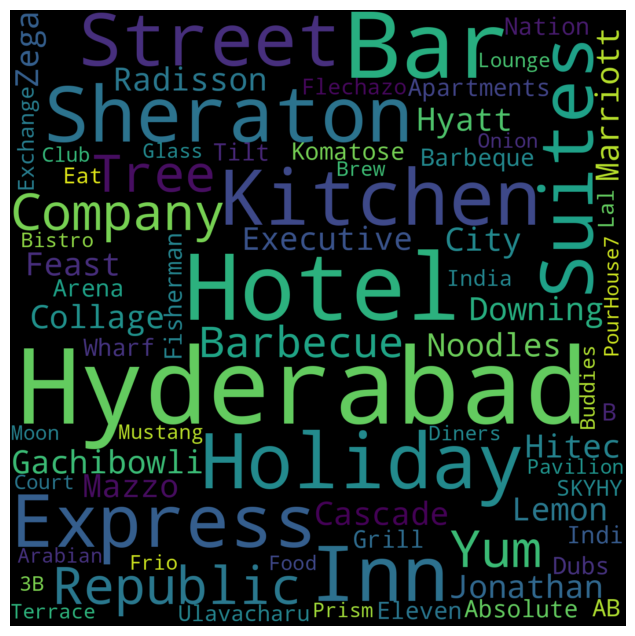

In [19]:
# Creating word cloud for expensive restaurants.
plt.figure(figsize=(18,8))
text = " ".join(name for name in meta_df_main.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

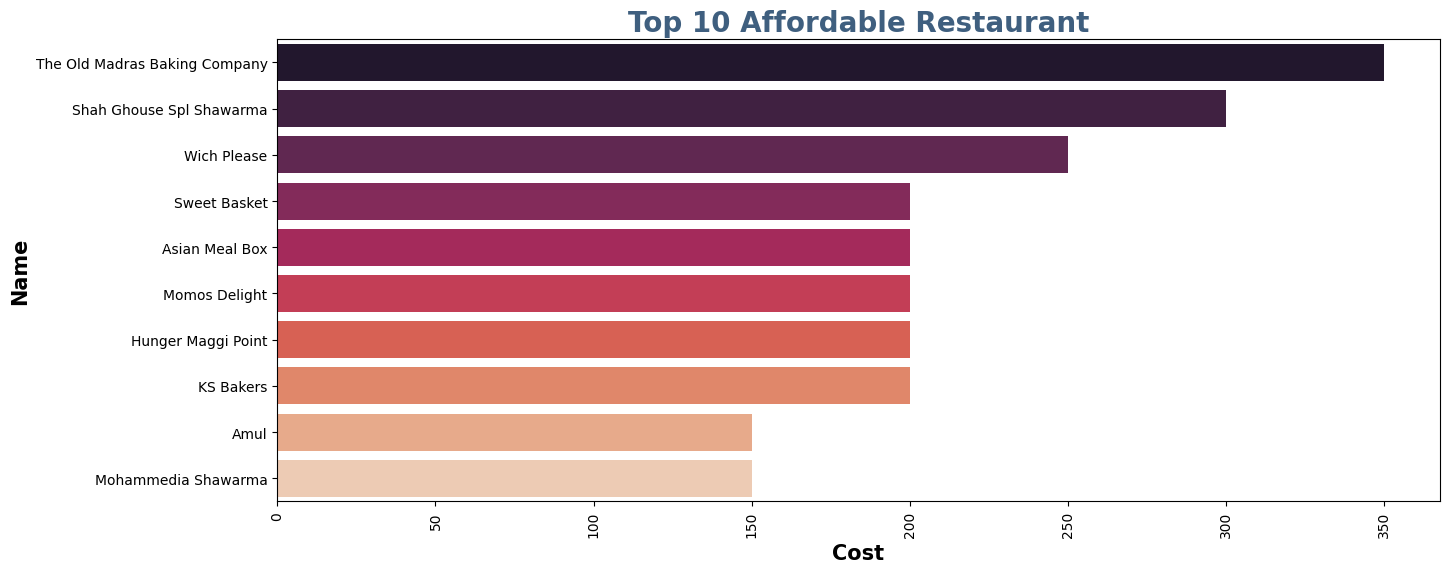

In [21]:
# Affordable price restaurants.

plt.figure(figsize=(15,6))

# Performing groupby To get values accourding to Names and sort it for visualisation.
top_10_affor_rest=meta_df_main[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)

# Lables for X and Y axis
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']

# Assigning the arguments for chart
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rocket')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: >

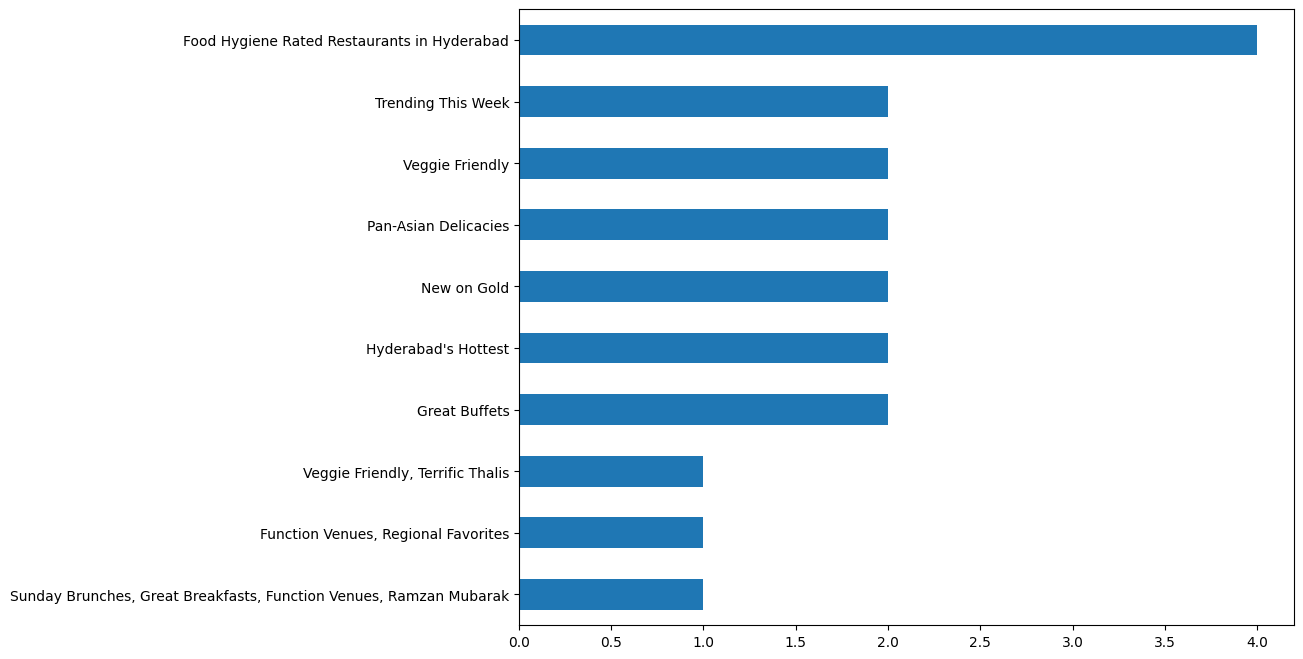

In [23]:
# Visualisation the value counts of collection. 
meta_df_main['Collections'].value_counts()[0:10].sort_values().plot(figsize=(10,8),kind='barh')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The resulting bar chart shows the top 10 most frequent values in the Collections column on the y-axis and their corresponding counts on the x-axis. The horizontal orientation of the bars makes it easy to compare the counts of the different collections. The longer the bar, the higher the count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#**Text preprocessing for the meta dataset.**
In Order to plot the cuisines from the data we have to count the frequency of the words from the document.(Frequency of cuisine). For that We have to perform the opration like removing stop words, Convert all the text into lower case, removing punctuations, removing repeated charactors, removing Numbers and emojies and finally count vectorizer.



In [25]:
# Downloading and importing the dependancies for text cleaning.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:

# Extracting the stopwords from nltk library for English corpus.
sw = stopwords.words('english')

In [27]:
# Creating a function for removing stopwords.
def stopwords(text):
    '''a function for removing the stopword'''

    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in str(text).split() if word.lower() not in sw]

    # joining the list of words with space separator
    return " ".join(text)

In [28]:
# Removing stopwords from Cuisines.
meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda text: stopwords(text))
meta_df_main['Cuisines'].head()
     

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [29]:
# Defining the function for removing punctuation.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string

    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [31]:
# Removing punctuation from Cuisines.
meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x: remove_punctuation(x))
meta_df_main['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Punctuations present in the text are removed successfully

In [32]:
# Cleaning and removing Numbers.
import re

In [33]:
# Writing a function to remove repeating characters.
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [35]:
# Removing repeating characters from Cuisines.
meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df_main['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [36]:
# Removing the Numbers from the data.
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [37]:
# Implementing the cleaning.
meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df_main['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [39]:
# Top 20 Two word Frequencies of Cuisines.
from collections import Counter 
text = ' '.join(meta_df_main['Cuisines'])

In [40]:
# separating each word from the sentences
words = text.split()

In [41]:
# Extracting the first word from the number for cuisines in the sentence.
two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}
     

In [42]:
# Extracting the most frequent cuisine present in the collection.
# Counting a frequency for cuisines.
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine Words', 'Frequency'])


In [43]:
# Sorting the most frequent cuisine at the top and order by descending
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)

In [44]:
# selecting first top 20 frequent cuisine.
two_words_20c = two_words_dfc[:20]
two_words_20c

,Cuisine Words,Frequency
6,north indian,61
9,indian chinese,27
42,fast food,15
4,south indian,9
5,indian north,9
33,chinese north,8
24,indian continental,6
65,italian north,6
8,biryani north,6
28,food north,6


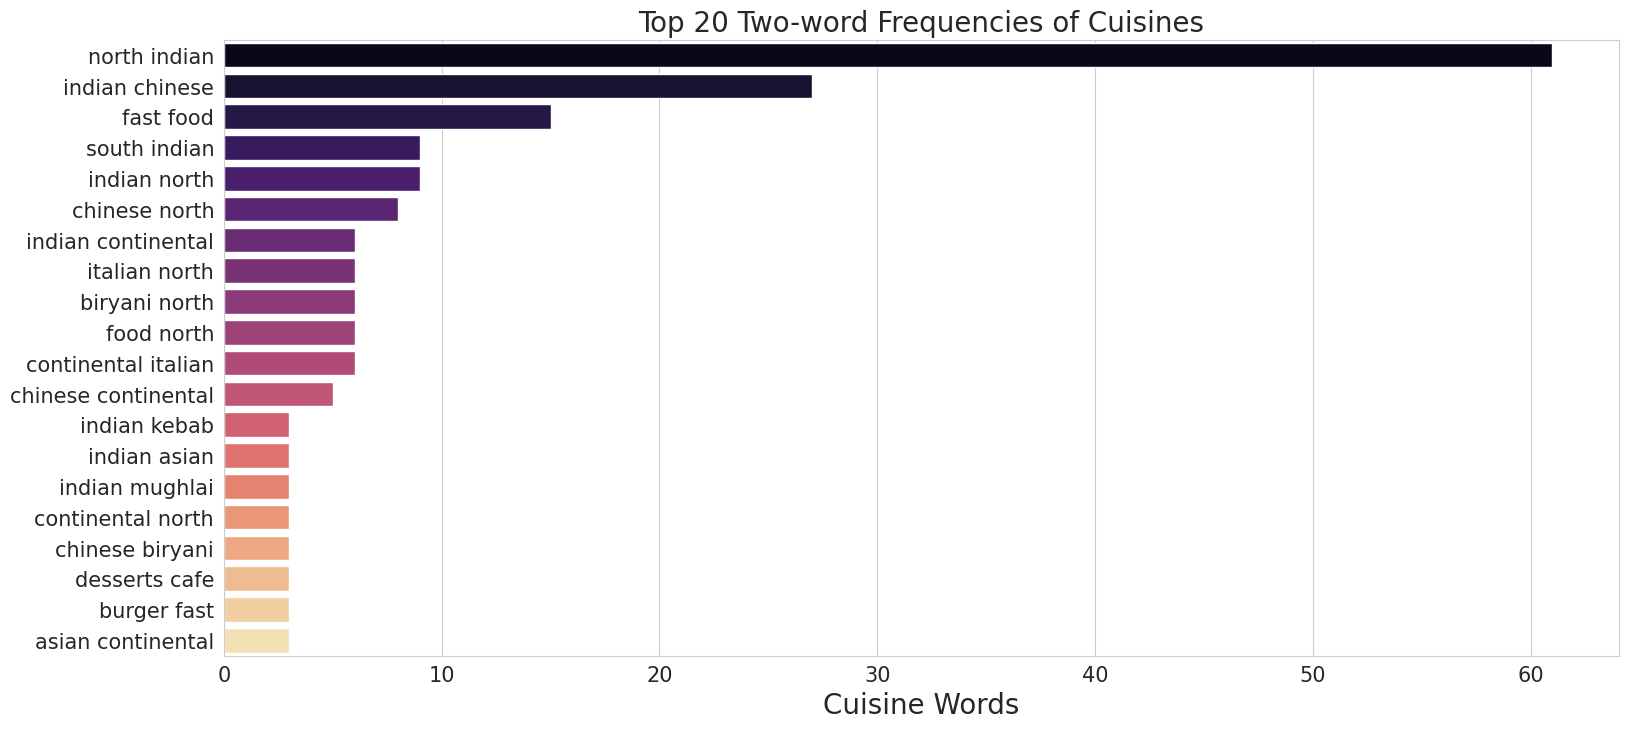

In [45]:
# Visualizing the frequency of the Cuisines.

sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Cuisine Words", x = "Frequency", data = two_words_20c, palette = "magma")
plt.title("Top 20 Two-word Frequencies of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

The DataFrame contains two columns: "Cuisine Words" and "Frequency." The "Cuisine Words" column lists the most frequent two-word cuisine terms, while the "Frequency" column shows the number of times each two-word cuisine term appears in the dataset.This information can be helpful in understanding the most common cuisine types in the dataset. It can also be used to identify trends and patterns in the types of cuisines that are popular or in demand among the customers.

# **Review Dataset Analysis**

In [50]:
# Loading the review dataset. 

review_df=pd.read_csv("/content/drive/MyDrive/Capstone_Project_4/Zomato Restaurant reviews.csv")

#**Dataset First View**


In [51]:
# First look of dataset. 

review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


#**Dataset Information**

In [52]:
# Info about review dataset.

review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#**Duplicate Values**

In [53]:
# Dataset Duplicate Value Count.
review_df.duplicated().sum()

36

#**Missing Values/Null Values**

In [54]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

As we can see, there are few missing values, so I decide to drop them all because there isn't a big loss.

This notebook will use bokeh and plotly to see ratings, reviews and cost relationships , will use NLTK,gensim, to convert text to vectors to find relationships between text. We will also see wordclouds.

In [55]:
# proportion or percentage of occurrences for each unique value in the Rating column.
review_df['Rating'].value_counts(normalize=True)

5       0.384662
4       0.238205
1       0.174162
3       0.119755
2       0.068661
4.5     0.006926
3.5     0.004718
2.5     0.001907
1.5     0.000903
Like    0.000100
Name: Rating, dtype: float64

In [57]:
# Removing like value and taking the mean in the rating column.
review_df.loc[review_df['Rating'] == 'Like'] = np.nan

In [58]:
# Chenging the data type of rating column 
review_df['Rating']= review_df['Rating'].astype('float64')

In [59]:
print(review_df['Rating'].mean())

3.601044071880333


In [60]:
# Filling mean in place of null value
review_df['Rating'].fillna(3.6, inplace=True)

In [61]:
# Changing the data type of review column.
review_df['Review'] = review_df['Review'].astype(str)

In [62]:
# Creating a review_length column to check the frequency of each rating.
review_df['Review_length'] = review_df['Review'].apply(len)

In [63]:
review_df['Rating'].value_counts(normalize=True)
     

5.0    0.3832
4.0    0.2373
1.0    0.1735
3.0    0.1193
2.0    0.0684
4.5    0.0069
3.5    0.0047
3.6    0.0039
2.5    0.0019
1.5    0.0009
Name: Rating, dtype: float64

#**The Ratings distribution 38% reviews are 5 rated,23% are 4 rated stating that people do rate good food high.**

In [64]:
# Visualizing the rating column against the review length.
# Polting the frequency of the rating on scatter bar plot

import plotly.express as px
fig = px.scatter(review_df, x=review_df['Rating'], y=review_df['Review_length'])
fig.update_layout(title_text="Rating vs Review Length")
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='crimson',tickangle=45, ticklen=10)
fig.show()

The scatter plot confirms that length of review doesnt impact ratings.

In [65]:
# Creating polarity variable to see sentiments in reviews.(using textblob) 
from textblob import TextBlob
review_df['Polarity'] = review_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

<Axes: ylabel='Frequency'>

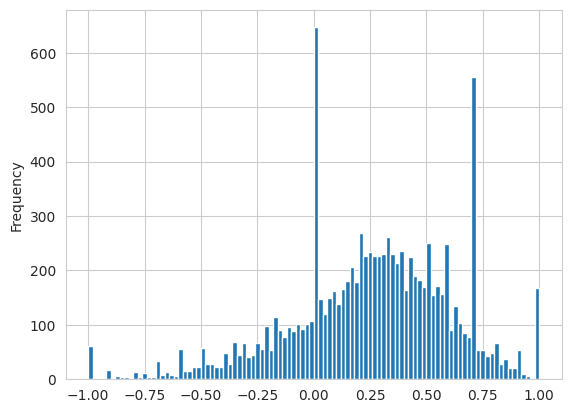

In [66]:
# Visualizing the polarity using histogram.
review_df['Polarity'].plot(kind='hist', bins=100)
     

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

#**Removing Stop words**
Stop words are used in a language to removed from text data during natural language processing. This helps to reduce the dimensionality of the feature space and focus on the more important words in the text.

In [67]:
# Importing dependancies and removing stopwords.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Creating argument for stop words.
stop_words = stopwords.words('english')

print(stop_words)
rest_word=['order','restaurant','taste','ordered','good','food','table','place','one','also']
rest_word
     

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['order',
 'restaurant',
 'taste',
 'ordered',
 'good',
 'food',
 'table',
 'place',
 'one',
 'also']

#**Chart - 7**

In [68]:
# We will extrapolate the 15 profiles that have made more reviews.

# Groupby on the basis of rivewer gives the fequency of the reviews
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')

 # Sorting the frequency of reviews decending
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)

# Selecting the top 15 reviewrs
top_reviewers = reviewer_list[:15]

Text(0, 0.5, 'N of reviews')

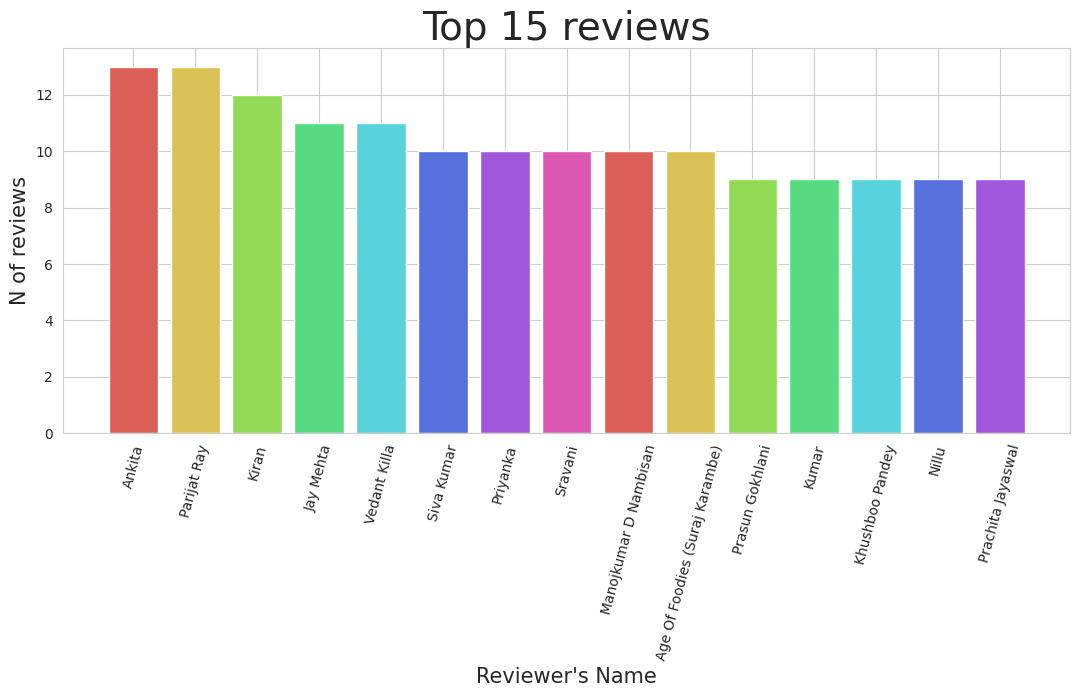

In [69]:
# Visualizing the top 15 reviewers.
plt.figure(figsize=(13,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review_Count'], color = sns.color_palette("hls", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviews',size=28)
plt.xlabel("Reviewer's Name",size=15)
plt.ylabel('N of reviews',size=15)

In [70]:
# Calculate the average of their ratings review.
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average_Ratings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]
     

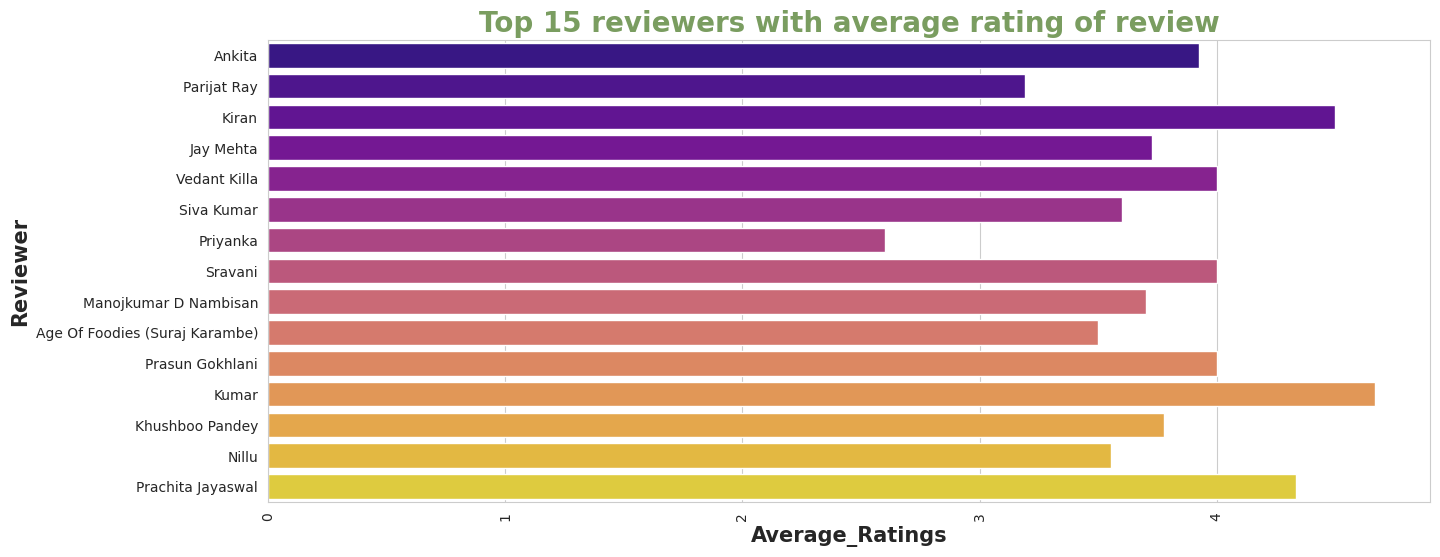

In [71]:
# Average rating of top reviewers.
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['Average_Ratings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=90)[-5])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Ratings",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

The output of top 15 reviewers based on the number of reviews they have made in a given dataset. Analyzing the reviews made by these top reviewers can help in improving customer satisfaction and loyalty, ultimately leading to increased revenue and growth.

In [72]:
# Removing Special characters and punctuation from review columns.

import re
review_df['Review']=review_df['Review'].map(lambda x: re.sub('[,\.!?]','', x))
review_df['Review']=review_df['Review'].map(lambda x: x.lower())
review_df['Review']=review_df['Review'].map(lambda x: x.split())
review_df['Review']=review_df['Review'].apply(lambda x: [item for item in x if item not in stop_words])
review_df['Review']=review_df['Review'].apply(lambda x: [item for item in x if item not in rest_word])
     

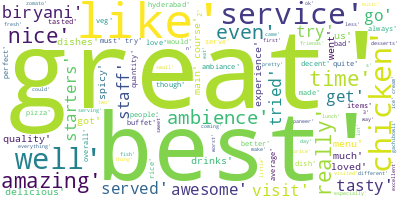

In [73]:
# Word cloud for positive reviews.

from wordcloud import WordCloud
review_df['Review']=review_df['Review'].astype(str)

ps = PorterStemmer() 
review_df['Review']=review_df['Review'].map(lambda x: ps.stem(x))
long_string = ','.join(list(review_df['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Service, taste, time, starters are key to good review.

In [74]:
# Creating two datasets for positive and negative reviews.

review_df['Rating']= pd.to_numeric(review_df['Rating'],errors='coerce')   # The to_numeric() function in pandas is used to convert a pandas object to a numeric type.
pos_rev = review_df[review_df.Rating>= 3]
neg_rev = review_df[review_df.Rating< 3]

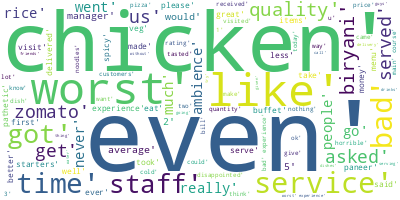

In [75]:
# Negative reviews wordcloud.

long_string = ','.join(list(neg_rev['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Service , bad chicken , staff behavior, stale food are key reasons for neagtive reviews

#**Text Cleaning**

In [ ]:
# Creating word embeddings and t-SNE plot. (for positive and negative reviews).

from gensim.models import word2vec
pos_rev = review_df[review_df.Rating>= 3]
neg_rev = review_df[review_df.Rating< 3]
     

Dataframe where the Rating column is greater than or equal to 3. This selects all the positive reviews where as the Rating column is less than 3. This selects all the negative reviews, assuming that the Rating column is a scale from 1 to 5 with 5 being the highest rating.

**Create a corpus of words from the negative reviews in the neg_rev DataFrame.**

In [76]:
# Plot for negative reviews.
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus
    
# Display the first two elements of the corpus list
corpus = build_corpus(neg_rev)        
corpus[0:2]
     

[["['corn',",
  "'cheese',",
  "'balls',",
  "'manchow',",
  "'soup',",
  "'paneer',",
  "'shashlik',",
  "'sizzler',",
  "'sizzler',",
  "'stale',",
  "'paneer',",
  "'smelling',",
  "'waiter',",
  "'impolite',",
  "'even',",
  "'accept',",
  "'mistake',",
  "'never',",
  "'going']"],
 ["['went',",
  "'team',",
  "'lunch',",
  "'worst',",
  "'tasteless',",
  "'service',",
  "'slow',",
  "'ac',",
  "'working',",
  "'we’ve',",
  "'requested',",
  "'multiple',",
  "'times',",
  "'use',",
  "'please',",
  "'don’t',",
  "'waste',",
  "'money',",
  "'strictly',",
  "'recommend',",
  "'prefer',",
  "'beyond',",
  "'flavours']"]]

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***